![Scikit-Learn logo](img/scikit-learn-logo.png)

# <b>Introduction</b>

 
***

This notebooks purpose is to provide a clear and concise overview of the scikit-learn Python library as well as demonstrations of at least three interesting scikit-learn algorithms. Namely the (blank), (blank) and (blank) algorithms. These algorithms will also be accompanied by appropriate plots and other visualisations. 

In accordance with [GMIT's plagarism policy](https://www.gmit.ie/sites/default/files/public/general/docs/policy-plagiarism-2019.pdf), all work compiled in this notebook is owned by the author and the creators of the respective algorithms. All sources and aids used have been indicated as such. All texts either quoted directly or paraphrased have been indicated by in-text citations.

## Overview - What is Scikit-Learn?
***

Scikit-learn provides a range of supervised and unsupervised learning algorithms via a consistent interface in Python[[1]](#references). It is built upon the SciPy library which means it includes many recognisable Python libraries which are included in the SciPy library such as:
* <b>NumPy</b>: Base n-dimensional array package
* <b>SciPy</b>: Fundamental library for scientific computing
* <b>Matplotlib</b>: Comprehensive 2D/3D plotting
* <b>IPython</b>: Enhanced interactive console
* <b>Sympy</b>: Symbolic mathematics
* <b>Pandas</b>: Data structures and analysis


The library is focused on modeling data. It is not focused on loading, manipulating and summarizing data. it is described on the offical SciKit page as[[2]](#references): 

    "Simple and efficient tools for predictive data analysis
    Accessible to everybody, and reusable in various contexts
    Built on NumPy, SciPy, and matplotlib
    Open source, commercially usable - BSD license"
    




# <b>Interesting Algorithms</b>
***

## **Linear Regression** - Predicting the stock price of Netflix 

Dataset taken from: **[here](https://finance.yahoo.com/quote/nflx/history/?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAAFA2PMvQkzsotUIvyr7kLpidRReghKPM7ESGIrULUHoqhfacsISd_Q6LHVzqr67qD9_I5GikFwmZbC1QD3ZMcPQha7cUjLHwpxDw2hovGySgU9BDUtMutRnSEef3YigFbelaMh4bDGXRHKhxFXxiO6z5mhBGEr9xl-odHuH9H1yW)**

Here, a machine learning linear regression model will be created that takes information from the past Netflix stock prices and returns a prediction of the stock price for the next day.

### **Setup**
***

In [12]:
# Numerical arrays.
import numpy as np

# Data frames.
import pandas as pd

# Plotting.
import matplotlib.pyplot as plt

# Linear regression.
from sklearn.linear_model import LinearRegression

# Helper functions.
import sklearn.model_selection as mod

# Scikit Learn test train split import.
from sklearn.model_selection import train_test_split

# Fancier, statistical plots.
import seaborn as sns

***

### **Reading in the Data**

In [2]:
# Load local .csv file as DataFrame
Df = pd.read_csv('NFLX.csv')

In [14]:
# Better look at the data
Df.describe()

,Close,S_3,S_9
count,243.000000,243.000000,243.000000
mean,560.104608,559.240918,557.934018
std,56.121735,55.716931,54.778862
min,484.980011,487.283325,490.152225
25%,513.790008,514.534998,517.139999
50%,546.700012,544.063334,539.828895
75%,602.894989,600.933329,599.188331
max,691.690002,687.036682,675.893324


***
### <b>Visualise the Data</b>

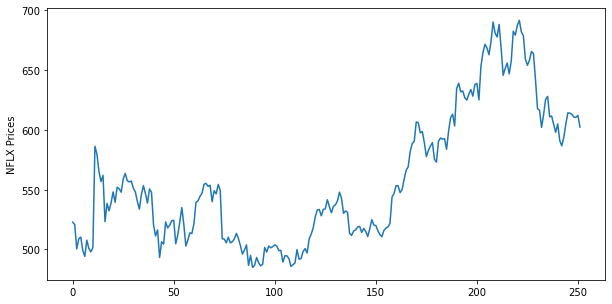

In [4]:
# Only keep close columns 
Df=Df[['Close']] 
# Drop rows with missing values 
Df= Df.dropna() 
# Plot the closing price of GLD 
Df.Close.plot(figsize=(10,5)) 
plt.ylabel("NFLX Prices")
plt.show()

***
### **Define explanatory variables**

In [5]:
Df['S_3'] = Df['Close'].shift(1).rolling(window=3).mean() 
Df['S_9']= Df['Close'].shift(1).rolling(window=9).mean() 
Df= Df.dropna() 
X = Df[['S_3','S_9']] 
X.head()

,S_3,S_9
9,500.966665,507.271108
10,502.210002,504.506666
11,500.203328,502.392222
12,528.696676,511.931115
13,555.983348,519.814450


***
### **Define explanatory variables**

In [6]:
y = Df['Close']
y.head()

9     497.980011
10    501.769989
11    586.340027
12    579.840027
13    565.169983
Name: Close, dtype: float64

***
### **Split the data into train and test dataset**
<ol>
    <li>First 80% of the data is used for training and remaining data for testing
    <li>X_train & y_train are training dataset
    <li>X_test & y_test are test dataset
</ol>

In [7]:
t=.8 
t = int(t*len(Df)) 
# Train dataset 
X_train = X[:t] 
y_train = y[:t]  
# Test dataset 
X_test = X[t:] 
y_test = y[t:]

***
### **Create a linear regression model**

If a mathematical relationship between the ‘x’ and ‘y’ variables which best explains the observed values of ‘y’ in terms of observed values of ‘x’ by fitting a line through a scatter plot then such an equation between x and y is called linear regression analysis.

$Y = m1 * X1 + m2 * X2 + C NFLX price = m1 * 3 days moving average + m2 * 15 days moving average + c$

In [8]:
linear = LinearRegression().fit(X_train,y_train)

***
### **Predicting the NFLX prices**

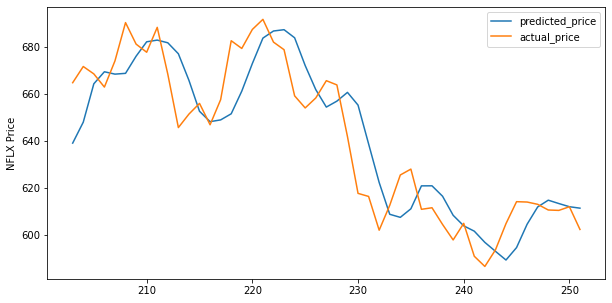

In [9]:
predicted_price = linear.predict(X_test)  
predicted_price = pd.DataFrame(predicted_price,index=y_test.index,columns = ['price'])  
predicted_price.plot(figsize=(10,5))  
y_test.plot()  
plt.legend(['predicted_price','actual_price'])  
plt.ylabel("NFLX Price")  
plt.show()


***
### **Checking our Accuracy**

In [10]:
r2_score = linear.score(X[t:],y[t:])*100  
float("{0:.2f}".format(r2_score))


78.85

The outputting prediction value is **78.85%** which isn't amazing. R-squared is always between 0 and 100%. A score close to 100% indicates that the model explains the NFLX prices well. This particular model does a mediocre job of predicting the next stock price.

***

### **Data Preprocessing** 

***

### **Classification Report**

### <b>Visualise the Data</b>

# References
***

<b>[1]</b> Brownlee, J., 2021. A Gentle Introduction to Scikit-Learn. [online] Machine Learning Mastery. 

Available at: <https://machinelearningmastery.com/a-gentle-introduction-to-scikit-learn-a-python-machine-learning-library/> [Accessed 19 November 2021].


<b>[2]</b>Scikit-learn.org. 2021. scikit-learn: machine learning in Python — scikit-learn 1.0.1 documentation. [online] 

Available at: <https://scikit-learn.org/stable/index.html> [Accessed 4 December 2021].

**[3]** Malik, U., 2022. Implementing SVM and Kernel SVM with Python's Scikit-Learn. [online] Stack Abuse. 

Available at: <https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/> [Accessed 2 January 2022].

**[4]** Kumar, R., 2022. Using Linear Regression To Predict AAPL (Apple stock) Prices In Python. [online] Medium. 

Available at: <https://medium.com/analytics-vidhya/using-linear-regression-to-predict-aapl-apple-stock-prices-in-python-1a629fbea15b> [Accessed 2 January 2022].

**[5]** West, Z., 2022. Predicting Stock Prices with Linear Regression in Python - αlphαrithms. [online] αlphαrithms. 

Available at: <https://www.alpharithms.com/predicting-stock-prices-with-linear-regression-214618/> [Accessed 2 January 2022].


# Resources
***